In [12]:
# 필수적인 라이브러리를 임포트

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [9]:
# 0. 데이터 불러오기
from utils.excel import from_excel

google_tabelog = from_excel(filepath="../googleplaces/tmp/google_tabelog_sapporo.xlsx")
print("Loaded {:d}x{:d} records".format(google_tabelog.shape[0], google_tabelog.shape[1]))
print("Columns: {}".format(google_tabelog.columns.values))

Loaded 1164x9 records
Columns: ['name' 'rating' 'reviews' 'price_night' 'price_noon' 'google_place_id'
 'google_rating' 'google_user_ratings_total' 'google_review_en']


In [46]:
# 1. 기초 통계분석: 평균, 분산, 중간값, 왜도, 분포
def analyse_basics(colname, include_missing):
    """
    평균, 분산, 중간값, 왜도, 최대, 최소, 데이터 갯수를 분석
    :param colname: 분석할 열(column)의 이름
    :type colname: str
    :param include_missing: 결측값(보통은 -1로 표현)을 넣을지 말지
    :type include_missing: bool 
    :return: (평균, 표준편차, 중간값, 왜도, 최대, 최소, 데이터 갯수)
    :rtype: Tuple
    """
    
    values = google_tabelog[colname]
    if not include_missing:
        values = values[values != -1]
    
    m = np.mean(values)
    s = np.std(values)
    med = np.median(values)
    skew = stats.skew(values)
    minval = np.min(values)
    maxval = np.max(values)
    count = values.shape[0]
    
    return m, s, med, skew, minval, maxval, count


def plot_dist(colname, include_missing, platform_name):
    """
    히스토그램과 누적분포도를 그려준다
    :param colname: 분석할 열(column)의 이름
    :type colname: str
    :param include_missing: 결측값(보통은 -1로 표현)을 넣을지 말지
    :type include_missing: bool 
    """
    data = google_tabelog[colname]
    if not include_missing:
        data = data[data != -1]
    plt.figure(1)
    plt.suptitle("Histogram of {:s} {:s}".format(platform_name, colname.capitalize()))
    plt.subplot(211)
    plt.hist(data, cumulative=False)
    plt.subplot(212)
    plt.hist(data, cumulative=True)
    plt.show()
    
    
# Tabelog 데이터
print("Analysing basic statistics of Sapporo's restaurants")
print("Starting from Tabelog")


Analysing basic statistics of Sapporo's restaurants
Starting from Tabelog


Tabelog rating Mean: 3.21 Std: 0.20 Median: 3.12 Skewness: 0.82 Min: 2.98 Max: 3.88 Count: 1086


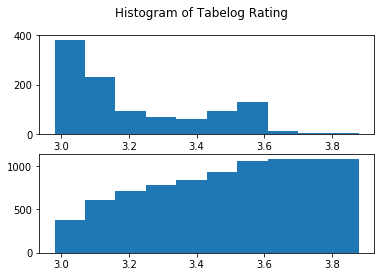

In [54]:
# Rating
platform_name = "Tabelog"
colname = "rating"
rating_stats = analyse_basics(colname=colname, include_missing=False)
print("{:s} {:s} Mean: {:.2f} Std: {:.2f} Median: {:.2f} Skewness: {:.2f} Min: {:.2f} Max: {:.2f} Count: {:d}".format(
        platform_name, colname, 
        rating_stats[0], rating_stats[1], rating_stats[2], rating_stats[3], 
        rating_stats[4], rating_stats[5], rating_stats[6]
    ))
plot_dist(colname=colname, include_missing=False, platform_name=platform_name)


Tabelog reviews Mean: 24.00 Std: 36.58 Median: 12.00 Skewness: 4.58 Min: 0.00 Max: 479.00 Count: 1164


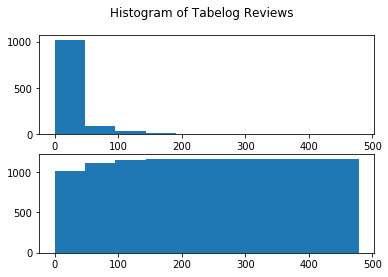

In [53]:
# Reviews
platform_name = "Tabelog"
colname = "reviews"
rating_stats = analyse_basics(colname=colname, include_missing=False)
print("{:s} {:s} Mean: {:.2f} Std: {:.2f} Median: {:.2f} Skewness: {:.2f} Min: {:.2f} Max: {:.2f} Count: {:d}".format(
        platform_name, colname, 
        rating_stats[0], rating_stats[1], rating_stats[2], rating_stats[3], 
        rating_stats[4], rating_stats[5], rating_stats[6]
    ))
plot_dist(colname=colname, include_missing=False, platform_name=platform_name)


Tabelog price_night Mean: 4381.43 Std: 2970.75 Median: 3999.00 Skewness: 3.45 Min: 999.00 Max: 29999.00 Count: 1093


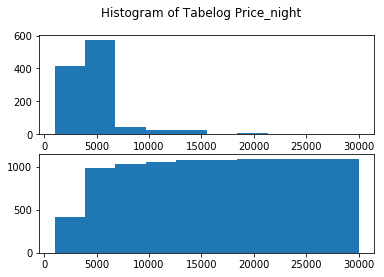

In [52]:
# Night Price
platform_name = "Tabelog"
colname = "price_night"
rating_stats = analyse_basics(colname=colname, include_missing=False)
print("{:s} {:s} Mean: {:.2f} Std: {:.2f} Median: {:.2f} Skewness: {:.2f} Min: {:.2f} Max: {:.2f} Count: {:d}".format(
        platform_name, colname, 
        rating_stats[0], rating_stats[1], rating_stats[2], rating_stats[3], 
        rating_stats[4], rating_stats[5], rating_stats[6]
    ))
plot_dist(colname=colname, include_missing=False, platform_name=platform_name)


Tabelog price_noon Mean: 1877.91 Std: 1363.85 Median: 1999.00 Skewness: 5.00 Min: 999.00 Max: 14999.00 Count: 479


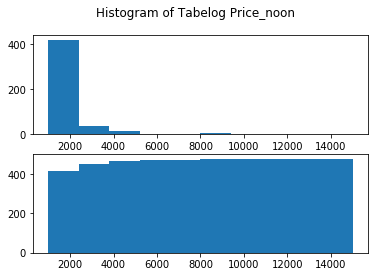

In [51]:
# Noon Price
platform_name = "Tabelog"
colname = "price_noon"
rating_stats = analyse_basics(colname=colname, include_missing=False)
print("{:s} {:s} Mean: {:.2f} Std: {:.2f} Median: {:.2f} Skewness: {:.2f} Min: {:.2f} Max: {:.2f} Count: {:d}".format(
        platform_name, colname, 
        rating_stats[0], rating_stats[1], rating_stats[2], rating_stats[3], 
        rating_stats[4], rating_stats[5], rating_stats[6]
    ))
plot_dist(colname=colname, include_missing=False, platform_name=platform_name)


In [42]:
# Google 데이터
print("Analysing basic statistics of Sapporo's restaurants")
print("Now Google's Data")

Analysing basic statistics of Sapporo's restaurants
Now Google's Data


Google google_rating Mean: 3.93 Std: 0.48 Median: 4.00 Skewness: -1.03 Min: 1.00 Max: 5.00 Count: 1108


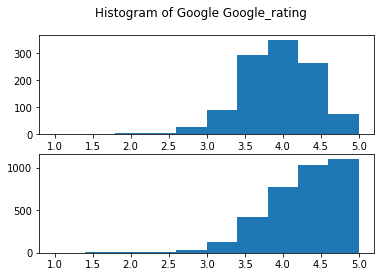

In [49]:
# Google Rating
platform_name = "Google"
colname = "google_rating"
rating_stats = analyse_basics(colname=colname, include_missing=False)
print("{:s} {:s} Mean: {:.2f} Std: {:.2f} Median: {:.2f} Skewness: {:.2f} Min: {:.2f} Max: {:.2f} Count: {:d}".format(
        platform_name, colname, 
        rating_stats[0], rating_stats[1], rating_stats[2], rating_stats[3], 
        rating_stats[4], rating_stats[5], rating_stats[6]
    ))
plot_dist(colname=colname, include_missing=False, platform_name=platform_name)


Google google_user_ratings_total Mean: 79.75 Std: 344.77 Median: 35.00 Skewness: 27.12 Min: 0.00 Max: 10915.00 Count: 1164


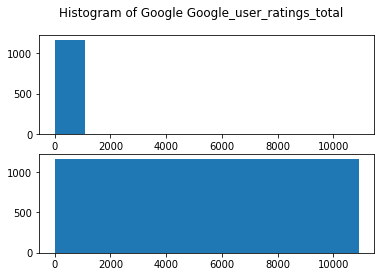

In [47]:
# Google User Ratings
platform_name = "Google"
colname = "google_user_ratings_total"
rating_stats = analyse_basics(colname=colname, include_missing=False)
print("{:s} {:s} Mean: {:.2f} Std: {:.2f} Median: {:.2f} Skewness: {:.2f} Min: {:.2f} Max: {:.2f} Count: {:d}".format(
        platform_name, colname, 
        rating_stats[0], rating_stats[1], rating_stats[2], rating_stats[3], 
        rating_stats[4], rating_stats[5], rating_stats[6]
    ))
plot_dist(colname=colname, include_missing=False, platform_name=platform_name)


In [55]:
# 그래프를 보니 특정 값 때문에 분포를 제대로 살피지 못하는 경우가 있다
# 그런 경우까지 잘 살펴보기 위해 x축에 로그를 씌워보자 


def plot_dist_log(colname, include_missing, platform_name):
    """
    히스토그램을 그릴 때 x축을 로그 스케일로 그린다
    :param colname: 분석할 열(column)의 이름
    :type colname: str
    :param include_missing: 결측값(보통은 -1로 표현)을 넣을지 말지
    :type include_missing: bool 
    """
    data = google_tabelog[colname]
    if not include_missing:
        data = data[data != -1]
    plt.figure(1)
    plt.suptitle("Histogram of {:s} {:s}".format(platform_name, colname.capitalize()))
    plt.subplot(111)
    plt.xscale('log')
    plt.hist(data, cumulative=False)
    plt.show()


Tabelog reviews Mean: 24.00 Std: 36.58 Median: 12.00 Skewness: 4.58 Min: 0.00 Max: 479.00 Count: 1164


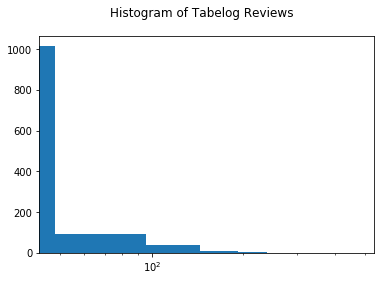

In [56]:
# Tabelog Reviews
platform_name = "Tabelog"
colname = "reviews"
rating_stats = analyse_basics(colname=colname, include_missing=False)
print("{:s} {:s} Mean: {:.2f} Std: {:.2f} Median: {:.2f} Skewness: {:.2f} Min: {:.2f} Max: {:.2f} Count: {:d}".format(
        platform_name, colname, 
        rating_stats[0], rating_stats[1], rating_stats[2], rating_stats[3], 
        rating_stats[4], rating_stats[5], rating_stats[6]
    ))
plot_dist_log(colname=colname, include_missing=False, platform_name=platform_name)


Tabelog price_night Mean: 4381.43 Std: 2970.75 Median: 3999.00 Skewness: 3.45 Min: 999.00 Max: 29999.00 Count: 1093


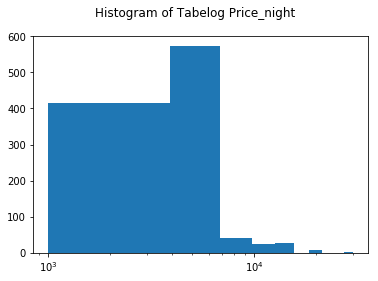

In [57]:
# Night Price
platform_name = "Tabelog"
colname = "price_night"
rating_stats = analyse_basics(colname=colname, include_missing=False)
print("{:s} {:s} Mean: {:.2f} Std: {:.2f} Median: {:.2f} Skewness: {:.2f} Min: {:.2f} Max: {:.2f} Count: {:d}".format(
        platform_name, colname, 
        rating_stats[0], rating_stats[1], rating_stats[2], rating_stats[3], 
        rating_stats[4], rating_stats[5], rating_stats[6]
    ))
plot_dist_log(colname=colname, include_missing=False, platform_name=platform_name)


Tabelog price_noon Mean: 1877.91 Std: 1363.85 Median: 1999.00 Skewness: 5.00 Min: 999.00 Max: 14999.00 Count: 479


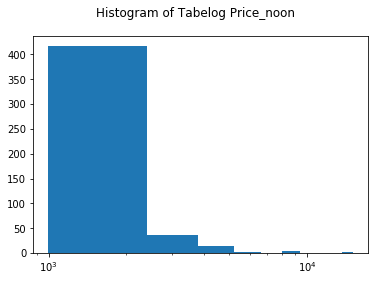

In [58]:
# Noon Price
platform_name = "Tabelog"
colname = "price_noon"
rating_stats = analyse_basics(colname=colname, include_missing=False)
print("{:s} {:s} Mean: {:.2f} Std: {:.2f} Median: {:.2f} Skewness: {:.2f} Min: {:.2f} Max: {:.2f} Count: {:d}".format(
        platform_name, colname, 
        rating_stats[0], rating_stats[1], rating_stats[2], rating_stats[3], 
        rating_stats[4], rating_stats[5], rating_stats[6]
    ))
plot_dist_log(colname=colname, include_missing=False, platform_name=platform_name)


Google google_user_ratings_total Mean: 79.75 Std: 344.77 Median: 35.00 Skewness: 27.12 Min: 0.00 Max: 10915.00 Count: 1164


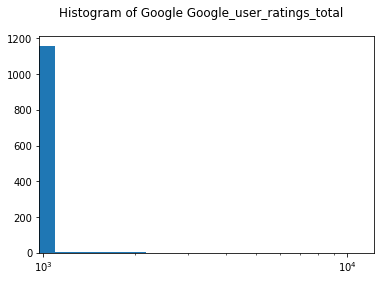

In [59]:
# Google User Ratings
platform_name = "Google"
colname = "google_user_ratings_total"
rating_stats = analyse_basics(colname=colname, include_missing=False)
print("{:s} {:s} Mean: {:.2f} Std: {:.2f} Median: {:.2f} Skewness: {:.2f} Min: {:.2f} Max: {:.2f} Count: {:d}".format(
        platform_name, colname, 
        rating_stats[0], rating_stats[1], rating_stats[2], rating_stats[3], 
        rating_stats[4], rating_stats[5], rating_stats[6]
    ))
plot_dist_log(colname=colname, include_missing=False, platform_name=platform_name)


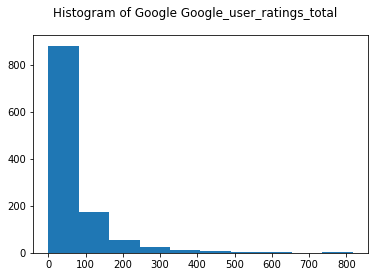

In [65]:
# 여전히 분포가 잘 보이지 않아서 직접 데이터 범위를 쪼개서 살펴보기로 한다

data = google_tabelog["google_user_ratings_total"]
data = data[data <= 1000]

plt.figure(1)
plt.suptitle("Histogram of {:s} {:s}".format(platform_name, colname.capitalize()))
plt.subplot(111)
plt.hist(data, cumulative=False)
plt.show()


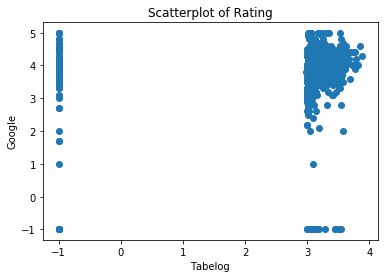

In [68]:
# 2. Google과 Tabelog 데이터를 비교하기

# 먼저, Scatterplot을 그려보자
plt.scatter(google_tabelog['rating'], google_tabelog['google_rating'])
plt.xlabel('Tabelog')
plt.ylabel('Google')
plt.title('Scatterplot of Rating')
plt.show()


Slope: 0.40 Intercept: 2.64 R2: 0.1813 p-value: 0.0000, Std Err: 0.07


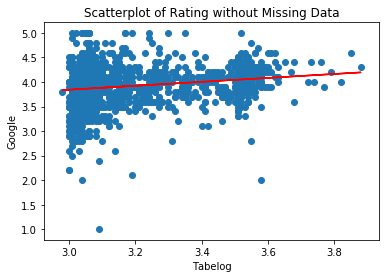

In [79]:
# 결측치들을 빼고 그려보도록 하자

tabelog_no_missing = google_tabelog['rating'] != -1
google_no_missing = google_tabelog['google_rating'] != -1
rating_no_missing = google_tabelog[tabelog_no_missing & google_no_missing]

x = rating_no_missing['rating']
y = rating_no_missing['google_rating']
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print("Slope: {:.2f} Intercept: {:.2f} R2: {:.4f} p-value: {:.4f}, Std Err: {:.2f}".format(
    slope, intercept, r_value, p_value, std_err
))

plt.scatter(x, y, label='original data')
plt.plot(x, intercept + x * slope, 'r', label='fitted line')
plt.xlabel('Tabelog')
plt.ylabel('Google')
plt.title('Scatterplot of Rating without Missing Data')
plt.show()


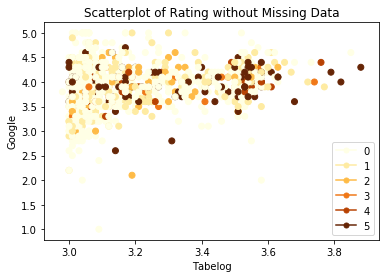

In [102]:
# 이번엔 제3의 변수들을 색으로 표현해보자

from matplotlib.lines import Line2D
from matplotlib.colors import Normalize
from matplotlib.cm import get_cmap

x = rating_no_missing['rating']
y = rating_no_missing['google_rating']
c = rating_no_missing['google_review_en']

c_unique = np.unique(c)
cmap = get_cmap('YlOrBr')
normalizer = Normalize(vmin=np.min(c_unique), vmax=np.max(c_unique))

legend_elements = [Line2D([0], [0], marker='o', markersize=5, 
                          color=cmap(normalizer(p)), label=p) for p in c_unique]

plt.scatter(x, y, c=c, cmap=cmap, norm=normalizer)
plt.xlabel('Tabelog')
plt.ylabel('Google')
plt.legend(handles=legend_elements, loc='lower right')
plt.title('Scatterplot of Rating without Missing Data')
plt.show()


Slope: -0.00 Intercept: 3.93 R2: -0.0008 p-value: 0.9796, Std Err: 0.01


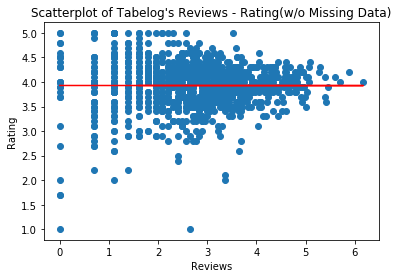

In [120]:
# 이번엔 평점과 리뷰 갯수를 같이 보도록 하자

tabelog_no_missing = google_tabelog['google_rating'] != -1
rating_no_missing = google_tabelog[tabelog_no_missing]

x = np.log(1+rating_no_missing['reviews'])
y = rating_no_missing['google_rating']
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print("Slope: {:.2f} Intercept: {:.2f} R2: {:.4f} p-value: {:.4f}, Std Err: {:.2f}".format(
    slope, intercept, r_value, p_value, std_err
))

plt.scatter(x, y, label='original data')
plt.plot(x, intercept + x * slope, 'r', label='fitted line')
plt.xlabel('Reviews')
plt.ylabel('Rating')
plt.title("Scatterplot of Tabelog's Reviews - Rating(w/o Missing Data)")
plt.show()